In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.display import display
from collections import Counter
from sklearn.ensemble import RandomForestClassifier

## 愛知県全域

In [90]:
book_list = []
for n in range(1, 279):
    file_name = '.csv' % (n)
    book_list.append(pd.read_csv(file_name))

In [91]:
df=pd.concat(book_list)
df=df.fillna(0)

In [4]:
df["車両相互フラグ"]=df.車両相互率.map(lambda x: 0 if x==0 else 1 if  x<0.00020 else 2)

### 事故件数の確認

In [5]:
df["車両相互フラグ"].value_counts()

0    541758
1      2673
2       423
Name: 車両相互フラグ, dtype: int64

In [6]:
((2673+423)/(541758+2673+423))*100

0.5682256164036604

** 事故：無事故　＝　（3000件：3000件）**でやってみる

In [8]:
#学習データ：テストデータ=1:1#
import random
make_accidents=df[df["車両相互フラグ"]!=0]
df_accidents_sample=make_accidents.sample(n=3000)

make_no_accidents=df[df["車両相互フラグ"]==0]
df_no_accidents_sample=make_no_accidents.sample(n=3000)

from sklearn.cross_validation import train_test_split
make_df=pd.concat([df_accidents_sample, df_no_accidents_sample])
make_df_Y=make_df["車両相互フラグ"]
make_df_X=make_df[[ "signal_f","density_5000m", "density_500m", "len1", "len2", "len3", "len4", "len5", "len6", "len7", "len8",
            "linecnt1", "linecnt2", "linecnt3", "linecnt4", "linecnt5", "linecnt6", "linecnt7", "linecnt8",
            "angle1", "angle2", "angle3", "angle4", "angle5", "angle6", "angle7" , "angle8", "length_station",
            "acc_angle_station", "angle_per_length_station", "length_school", "acc_angle_school", 
            "closeness_500", "closeness_5000", "betweenness_5000", "betweenness_500"]]
(X_train, X_test, y_train, y_test) = train_test_split(make_df_X, make_df_Y, test_size = 0.2)

In [9]:
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators'  : [10, 20, 50, 100, 200, 500],
    'random_state' : [0],
    'max_depth': [10, 20, 50, 100, 200, 500],
    'n_jobs': [-1]
         }
mod = RandomForestClassifier()
# ハイパーパラメータ探索
cv = GridSearchCV(mod, params, cv = 10, scoring= 'mean_squared_error', n_jobs =1)
cv.fit(X_train, y_train)

/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sam

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 20, 50, 100, 200, 500], 'random_state': [0], 'max_depth': [10, 20, 50, 100, 200, 500], 'n_jobs': [-1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='mean_squared_error', verbose=0)

1回目

In [13]:
cv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [14]:
display(cv.best_estimator_.score(X_test, y_test))
display(cv.best_estimator_.score(X_test[y_test>0], y_test[y_test>0]))

0.83833333333333337

0.73797678275290213

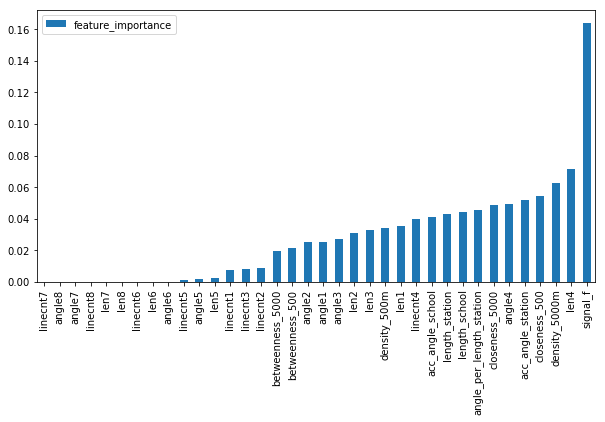

In [56]:
#np.arange(27)

importance=pd.DataFrame({ "feature_importance": cv.best_estimator_.feature_importances_}, index=[ "signal_f","density_5000m", "density_500m", "len1", "len2", "len3", "len4", "len5", "len6", "len7", "len8",
            "linecnt1", "linecnt2", "linecnt3", "linecnt4", "linecnt5", "linecnt6", "linecnt7", "linecnt8",
            "angle1", "angle2", "angle3", "angle4", "angle5", "angle6", "angle7" , "angle8", "length_station",
            "acc_angle_station", "angle_per_length_station", "length_school", "acc_angle_school", 
            "closeness_500", "closeness_5000", "betweenness_5000", "betweenness_500"])

importance.sort_values(ascending=True, by="feature_importance").plot(kind="bar", figsize=(10, 5))
plt.show()




2回目

In [18]:
cv.best_estimator

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [19]:
display(cv.best_estimator_.score(X_test, y_test))
display(cv.best_estimator_.score(X_test[y_test>0], y_test[y_test>0]))

0.83250000000000002

0.71701388888888884

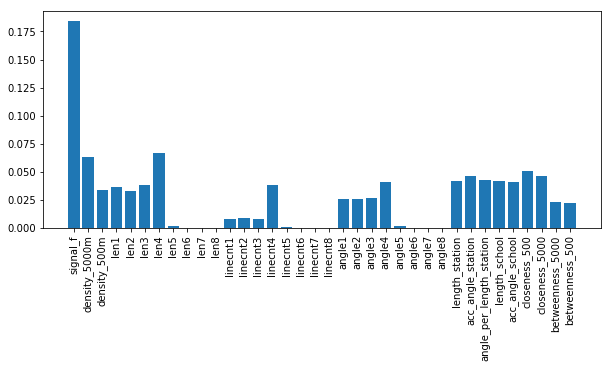

In [20]:
#np.arange(27)
X=np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36])
plt.figure(figsize=(10, 4))
importance=cv.best_estimator_.feature_importances_
plt.bar(X,importance)
plt.xticks(X, [ "signal_f","density_5000m", "density_500m", "len1", "len2", "len3", "len4", "len5", "len6", "len7", "len8",
            "linecnt1", "linecnt2", "linecnt3", "linecnt4", "linecnt5", "linecnt6", "linecnt7", "linecnt8",
            "angle1", "angle2", "angle3", "angle4", "angle5", "angle6", "angle7" , "angle8", "length_station",
            "acc_angle_station", "angle_per_length_station", "length_school", "acc_angle_school", 
            "closeness_500", "closeness_5000", "betweenness_5000", "betweenness_500"],rotation=90)
plt.show()

3回目

In [23]:
cv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [24]:
display(cv.best_estimator_.score(X_test, y_test))
display(cv.best_estimator_.score(X_test[y_test>0], y_test[y_test>0]))

0.8208333333333333

0.70715474209650586

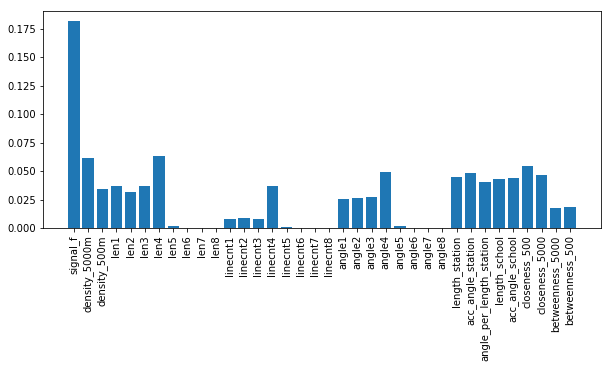

In [25]:
#np.arange(27)
X=np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36])
plt.figure(figsize=(10, 4))
importance=cv.best_estimator_.feature_importances_
plt.bar(X,importance)
plt.xticks(X, [ "signal_f","density_5000m", "density_500m", "len1", "len2", "len3", "len4", "len5", "len6", "len7", "len8",
            "linecnt1", "linecnt2", "linecnt3", "linecnt4", "linecnt5", "linecnt6", "linecnt7", "linecnt8",
            "angle1", "angle2", "angle3", "angle4", "angle5", "angle6", "angle7" , "angle8", "length_station",
            "acc_angle_station", "angle_per_length_station", "length_school", "acc_angle_school", 
            "closeness_500", "closeness_5000", "betweenness_5000", "betweenness_500"],rotation=90)
plt.show()

In [ ]:
cv.best_estimator_

In [ ]:
display(cv.best_estimator_.score(X_test, y_test))
display(cv.best_estimator_.score(X_test[y_test=0], y_test[y_test=0]))
display(cv.best_estimator_.score(X_test[y_test>0], y_test[y_test>0]))

### メッシュ76+245：都心部

In [61]:
df=pd.read_csv("/Users/daichisato/Documents/TresureData/myfile/aichi_link_node_mesh5k/node_check_mesh_245_76.csv")
df=df.fillna(0)

In [62]:
df["車両相互フラグ"]=df.車両相互率.map(lambda x: 0 if x==0 else 1 if  x<0.00020 else 2)

事故件数

In [63]:
df["車両相互フラグ"].value_counts()

0    12526
1      575
2       78
Name: 車両相互フラグ, dtype: int64

In [64]:
((575+78)/(12526+575+78))*100

4.9548524167235755

In [65]:
#学習データ：テストデータ=1:1#
import random
make_accidents=df[df["車両相互フラグ"]!=0]
df_accidents_sample=make_accidents.sample(n=650)

make_no_accidents=df[df["車両相互フラグ"]==0]
df_no_accidents_sample=make_no_accidents.sample(n=650)

from sklearn.cross_validation import train_test_split
make_df=pd.concat([df_accidents_sample, df_no_accidents_sample])
make_df_Y=make_df["車両相互フラグ"]
make_df_X=make_df[[ "signal_f","density_5000m", "density_500m", "len1", "len2", "len3", "len4", "len5", "len6", "len7", "len8",
            "linecnt1", "linecnt2", "linecnt3", "linecnt4", "linecnt5", "linecnt6", "linecnt7", "linecnt8",
            "angle1", "angle2", "angle3", "angle4", "angle5", "angle6", "angle7" , "angle8", "length_station",
            "acc_angle_station", "angle_per_length_station", "length_school", "acc_angle_school", 
            "closeness_500", "closeness_5000", "betweenness_5000", "betweenness_500"]]
(X_train, X_test, y_train, y_test) = train_test_split(make_df_X, make_df_Y, test_size = 0.2)

In [66]:
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators'  : [3, 5, 10, 20, 50, 100, 200, 500],
    'random_state' : [0],
    'max_depth': [3, 5, 10, 20, 50, 100, 200, 500],
    'n_jobs': [-1]
         }
mod = RandomForestClassifier()
# ハイパーパラメータ探索
cv = GridSearchCV(mod, params, cv = 5, scoring= 'mean_squared_error', n_jobs =1)
cv.fit(X_train, y_train)

/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sam

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [3, 5, 10, 20, 50, 100, 200, 500], 'random_state': [0], 'max_depth': [3, 5, 10, 20, 50, 100, 200, 500], 'n_jobs': [-1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='mean_squared_error', verbose=0)

1回目

In [67]:
cv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [68]:
display(cv.best_estimator_.score(X_test, y_test))
display(cv.best_estimator_.score(X_test[y_test>0], y_test[y_test>0]))

0.77307692307692311

0.66917293233082709

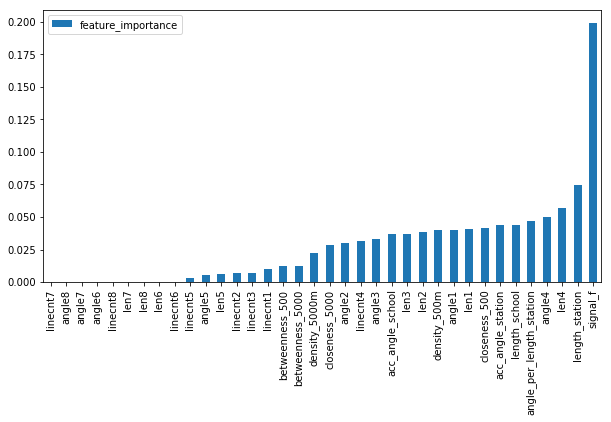

In [69]:
#np.arange(27)

importance=pd.DataFrame({ "feature_importance": cv.best_estimator_.feature_importances_}, index=[ "signal_f","density_5000m", "density_500m", "len1", "len2", "len3", "len4", "len5", "len6", "len7", "len8",
            "linecnt1", "linecnt2", "linecnt3", "linecnt4", "linecnt5", "linecnt6", "linecnt7", "linecnt8",
            "angle1", "angle2", "angle3", "angle4", "angle5", "angle6", "angle7" , "angle8", "length_station",
            "acc_angle_station", "angle_per_length_station", "length_school", "acc_angle_school", 
            "closeness_500", "closeness_5000", "betweenness_5000", "betweenness_500"])

importance.sort_values(ascending=True, by="feature_importance").plot(kind="bar", figsize=(10, 5))
plt.show()





2回目

In [72]:
cv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [73]:
display(cv.best_estimator_.score(X_test, y_test))
display(cv.best_estimator_.score(X_test[y_test>0], y_test[y_test>0]))

0.77692307692307694

0.73484848484848486

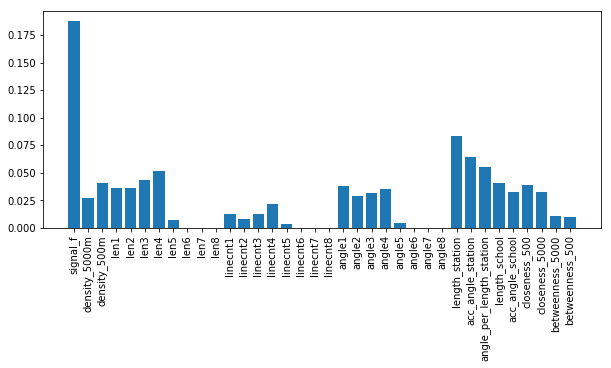

In [74]:
#np.arange(27)
X=np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36])
plt.figure(figsize=(10, 4))
importance=cv.best_estimator_.feature_importances_
plt.bar(X,importance)
plt.xticks(X, [ "signal_f","density_5000m", "density_500m", "len1", "len2", "len3", "len4", "len5", "len6", "len7", "len8",
            "linecnt1", "linecnt2", "linecnt3", "linecnt4", "linecnt5", "linecnt6", "linecnt7", "linecnt8",
            "angle1", "angle2", "angle3", "angle4", "angle5", "angle6", "angle7" , "angle8", "length_station",
            "acc_angle_station", "angle_per_length_station", "length_school", "acc_angle_school", 
            "closeness_500", "closeness_5000", "betweenness_5000", "betweenness_500"],rotation=90)
plt.show()

3回目

In [77]:
cv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [78]:
display(cv.best_estimator_.score(X_test, y_test))
display(cv.best_estimator_.score(X_test[y_test>0], y_test[y_test>0]))

0.78846153846153844

0.67200000000000004

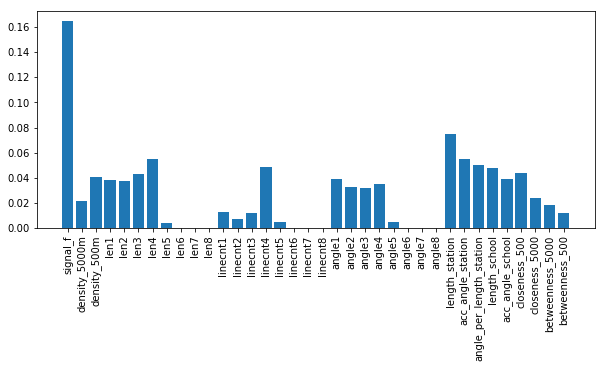

In [79]:
#np.arange(27)
X=np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36])
plt.figure(figsize=(10, 4))
importance=cv.best_estimator_.feature_importances_
plt.bar(X,importance)
plt.xticks(X, [ "signal_f","density_5000m", "density_500m", "len1", "len2", "len3", "len4", "len5", "len6", "len7", "len8",
            "linecnt1", "linecnt2", "linecnt3", "linecnt4", "linecnt5", "linecnt6", "linecnt7", "linecnt8",
            "angle1", "angle2", "angle3", "angle4", "angle5", "angle6", "angle7" , "angle8", "length_station",
            "acc_angle_station", "angle_per_length_station", "length_school", "acc_angle_school", 
            "closeness_500", "closeness_5000", "betweenness_5000", "betweenness_500"],rotation=90)
plt.show()

### メッシュ36：春日市（郊外の中心街）

In [71]:
df=pd.read_csv("/Users/daichisato/Documents/TresureData/myfile/aichi_link_node_mesh5k/node_check_mesh_36.csv")
df=df.fillna(0)

In [72]:
df["車両相互フラグ"]=df.車両相互率.map(lambda x: 0 if x==0 else 1 if  x<0.00020 else 2)

事故件数

In [73]:
df["車両相互フラグ"].value_counts()

0    6308
1      34
2       9
Name: 車両相互フラグ, dtype: int64

In [74]:
((34+9)/(6308+34+9))*100

0.6770587309085183

In [75]:
#学習データ：テストデータ=1:1#
import random
make_accidents=df[df["車両相互フラグ"]!=0]
df_accidents_sample=make_accidents.sample(n=40)

make_no_accidents=df[df["車両相互フラグ"]==0]
df_no_accidents_sample=make_no_accidents.sample(n=40)

from sklearn.cross_validation import train_test_split
make_df=pd.concat([df_accidents_sample, df_no_accidents_sample])
make_df_Y=make_df["車両相互フラグ"]
make_df_X=make_df[[ "signal_f","density_5000m", "density_500m", "len1", "len2", "len3", "len4", "len5", "len6", "len7", "len8",
            "linecnt1", "linecnt2", "linecnt3", "linecnt4", "linecnt5", "linecnt6", "linecnt7", "linecnt8",
            "angle1", "angle2", "angle3", "angle4", "angle5", "angle6", "angle7" , "angle8", "length_station",
            "acc_angle_station", "angle_per_length_station", "length_school", "acc_angle_school", 
            "closeness_500", "closeness_5000", "betweenness_5000", "betweenness_500"]]
(X_train, X_test, y_train, y_test) = train_test_split(make_df_X, make_df_Y, test_size = 0.2)

In [76]:
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators'  : [3, 5, 10, 20, 50, 100, 200, 500],
    'random_state' : [0],
    'max_depth': [3, 5, 10, 20, 50, 100, 200, 500],
    'n_jobs': [-1]
         }
mod = RandomForestClassifier()
# ハイパーパラメータ探索
cv = GridSearchCV(mod, params, cv = 5, scoring= 'mean_squared_error', n_jobs =1)
cv.fit(X_train, y_train)

/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sam

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [3, 5, 10, 20, 50, 100, 200, 500], 'random_state': [0], 'max_depth': [3, 5, 10, 20, 50, 100, 200, 500], 'n_jobs': [-1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='mean_squared_error', verbose=0)

1回目

In [77]:
cv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [78]:
display(cv.best_estimator_.score(X_test, y_test))
display(cv.best_estimator_.score(X_test[y_test>0], y_test[y_test>0]))

0.625

0.55555555555555558

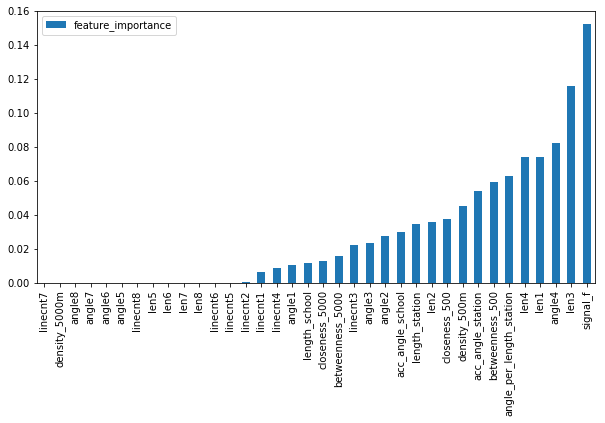

In [79]:
#np.arange(27)

importance=pd.DataFrame({ "feature_importance": cv.best_estimator_.feature_importances_}, index=[ "signal_f","density_5000m", "density_500m", "len1", "len2", "len3", "len4", "len5", "len6", "len7", "len8",
            "linecnt1", "linecnt2", "linecnt3", "linecnt4", "linecnt5", "linecnt6", "linecnt7", "linecnt8",
            "angle1", "angle2", "angle3", "angle4", "angle5", "angle6", "angle7" , "angle8", "length_station",
            "acc_angle_station", "angle_per_length_station", "length_school", "acc_angle_school", 
            "closeness_500", "closeness_5000", "betweenness_5000", "betweenness_500"])

importance.sort_values(ascending=True, by="feature_importance").plot(kind="bar", figsize=(10, 5))
plt.show()






2回目

In [90]:
cv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [91]:
display(cv.best_estimator_.score(X_test, y_test))
display(cv.best_estimator_.score(X_test[y_test>0], y_test[y_test>0]))

0.5625

0.33333333333333331

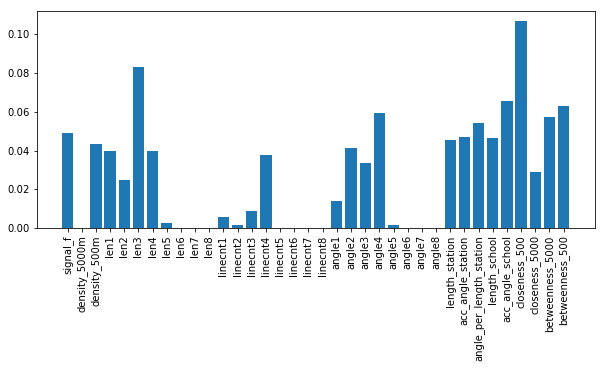

In [92]:
#np.arange(27)
X=np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36])
plt.figure(figsize=(10, 4))
importance=cv.best_estimator_.feature_importances_
plt.bar(X,importance)
plt.xticks(X, [ "signal_f","density_5000m", "density_500m", "len1", "len2", "len3", "len4", "len5", "len6", "len7", "len8",
            "linecnt1", "linecnt2", "linecnt3", "linecnt4", "linecnt5", "linecnt6", "linecnt7", "linecnt8",
            "angle1", "angle2", "angle3", "angle4", "angle5", "angle6", "angle7" , "angle8", "length_station",
            "acc_angle_station", "angle_per_length_station", "length_school", "acc_angle_school", 
            "closeness_500", "closeness_5000", "betweenness_5000", "betweenness_500"],rotation=90)
plt.show()

3回目

In [95]:
cv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [96]:
display(cv.best_estimator_.score(X_test, y_test))
display(cv.best_estimator_.score(X_test[y_test>0], y_test[y_test>0]))

0.625

0.42857142857142855

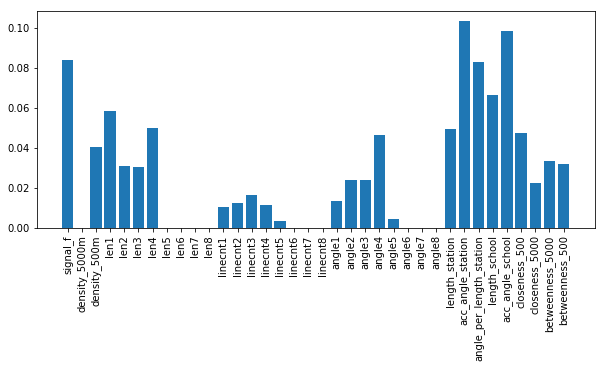

In [97]:
#np.arange(27)
X=np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36])
plt.figure(figsize=(10, 4))
importance=cv.best_estimator_.feature_importances_
plt.bar(X,importance)
plt.xticks(X, [ "signal_f","density_5000m", "density_500m", "len1", "len2", "len3", "len4", "len5", "len6", "len7", "len8",
            "linecnt1", "linecnt2", "linecnt3", "linecnt4", "linecnt5", "linecnt6", "linecnt7", "linecnt8",
            "angle1", "angle2", "angle3", "angle4", "angle5", "angle6", "angle7" , "angle8", "length_station",
            "acc_angle_station", "angle_per_length_station", "length_school", "acc_angle_school", 
            "closeness_500", "closeness_5000", "betweenness_5000", "betweenness_500"],rotation=90)
plt.show()

### メッシュ216+218+37：音羽蒲郡, 豊川, 春日井IC付近

In [80]:
df=pd.read_csv("/Users/daichisato/Documents/TresureData/myfile/aichi_link_node_mesh5k/node_check_mesh_216_218_37.csv")
df=df.fillna(0)

In [81]:
df["車両相互フラグ"]=df.車両相互率.map(lambda x: 0 if x==0 else 1 if  x<0.00020 else 2)

事故件数

In [82]:
df["車両相互フラグ"].value_counts()

0    10568
1       37
2        8
Name: 車両相互フラグ, dtype: int64

In [83]:
((37+8)/(10568+37+8))*100

0.4240082917177047

In [84]:
#学習データ：テストデータ=1:1#
import random
make_accidents=df[df["車両相互フラグ"]!=0]
df_accidents_sample=make_accidents.sample(n=45)

make_no_accidents=df[df["車両相互フラグ"]==0]
df_no_accidents_sample=make_no_accidents.sample(n=45)

from sklearn.cross_validation import train_test_split
make_df=pd.concat([df_accidents_sample, df_no_accidents_sample])
make_df_Y=make_df["車両相互フラグ"]
make_df_X=make_df[[ "signal_f","density_5000m", "density_500m", "len1", "len2", "len3", "len4", "len5", "len6", "len7", "len8",
            "linecnt1", "linecnt2", "linecnt3", "linecnt4", "linecnt5", "linecnt6", "linecnt7", "linecnt8",
            "angle1", "angle2", "angle3", "angle4", "angle5", "angle6", "angle7" , "angle8", "length_station",
            "acc_angle_station", "angle_per_length_station", "length_school", "acc_angle_school", 
            "closeness_500", "closeness_5000", "betweenness_5000", "betweenness_500"]]
(X_train, X_test, y_train, y_test) = train_test_split(make_df_X, make_df_Y, test_size = 0.2)

In [85]:
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators'  : [3, 5, 10, 20, 50, 100, 200, 500],
    'random_state' : [0],
    'max_depth': [3, 5, 10, 20, 50, 100, 200, 500],
    'n_jobs': [-1]
         }
mod = RandomForestClassifier()
# ハイパーパラメータ探索
cv = GridSearchCV(mod, params, cv = 5, scoring= 'mean_squared_error', n_jobs =1)
cv.fit(X_train, y_train)

/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sam

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [3, 5, 10, 20, 50, 100, 200, 500], 'random_state': [0], 'max_depth': [3, 5, 10, 20, 50, 100, 200, 500], 'n_jobs': [-1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='mean_squared_error', verbose=0)

1回目

In [86]:
cv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [87]:
display(cv.best_estimator_.score(X_test, y_test))
display(cv.best_estimator_.score(X_test[y_test>0], y_test[y_test>0]))

0.5

0.20000000000000001

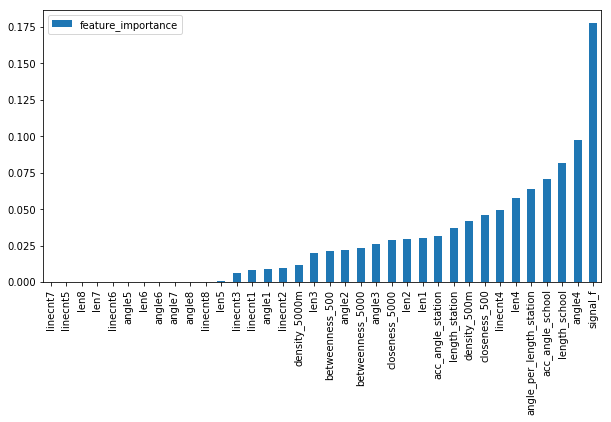

In [88]:
#np.arange(27)

importance=pd.DataFrame({ "feature_importance": cv.best_estimator_.feature_importances_}, index=[ "signal_f","density_5000m", "density_500m", "len1", "len2", "len3", "len4", "len5", "len6", "len7", "len8",
            "linecnt1", "linecnt2", "linecnt3", "linecnt4", "linecnt5", "linecnt6", "linecnt7", "linecnt8",
            "angle1", "angle2", "angle3", "angle4", "angle5", "angle6", "angle7" , "angle8", "length_station",
            "acc_angle_station", "angle_per_length_station", "length_school", "acc_angle_school", 
            "closeness_500", "closeness_5000", "betweenness_5000", "betweenness_500"])

importance.sort_values(ascending=True, by="feature_importance").plot(kind="bar", figsize=(10, 5))
plt.show()


2回目

In [113]:
cv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [114]:
display(cv.best_estimator_.score(X_test, y_test))
display(cv.best_estimator_.score(X_test[y_test>0], y_test[y_test>0]))

0.72222222222222221

0.375

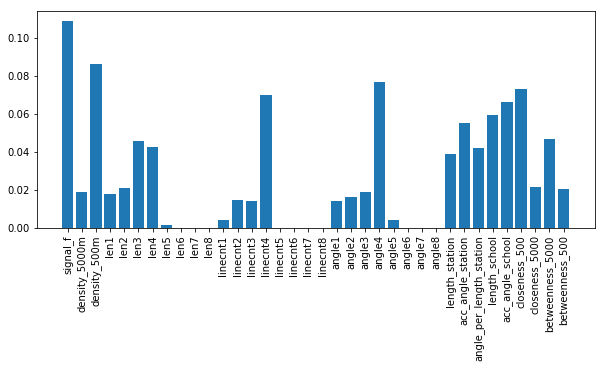

In [115]:
#np.arange(27)
X=np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36])
plt.figure(figsize=(10, 4))
importance=cv.best_estimator_.feature_importances_
plt.bar(X,importance)
plt.xticks(X, [ "signal_f","density_5000m", "density_500m", "len1", "len2", "len3", "len4", "len5", "len6", "len7", "len8",
            "linecnt1", "linecnt2", "linecnt3", "linecnt4", "linecnt5", "linecnt6", "linecnt7", "linecnt8",
            "angle1", "angle2", "angle3", "angle4", "angle5", "angle6", "angle7" , "angle8", "length_station",
            "acc_angle_station", "angle_per_length_station", "length_school", "acc_angle_school", 
            "closeness_500", "closeness_5000", "betweenness_5000", "betweenness_500"],rotation=90)
plt.show()

3回目

In [118]:
cv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [119]:
display(cv.best_estimator_.score(X_test, y_test))
display(cv.best_estimator_.score(X_test[y_test>0], y_test[y_test>0]))

0.66666666666666663

0.45454545454545453

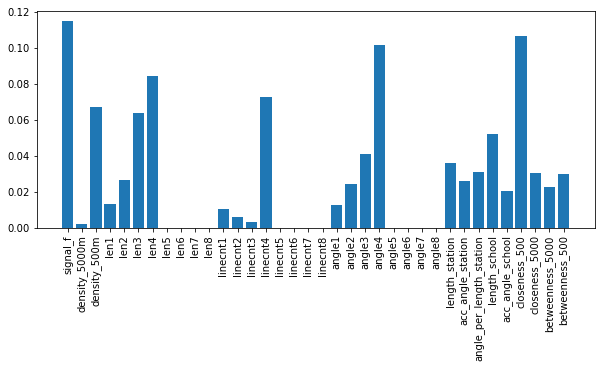

In [120]:
#np.arange(27)
X=np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36])
plt.figure(figsize=(10, 4))
importance=cv.best_estimator_.feature_importances_
plt.bar(X,importance)
plt.xticks(X, [ "signal_f","density_5000m", "density_500m", "len1", "len2", "len3", "len4", "len5", "len6", "len7", "len8",
            "linecnt1", "linecnt2", "linecnt3", "linecnt4", "linecnt5", "linecnt6", "linecnt7", "linecnt8",
            "angle1", "angle2", "angle3", "angle4", "angle5", "angle6", "angle7" , "angle8", "length_station",
            "acc_angle_station", "angle_per_length_station", "length_school", "acc_angle_school", 
            "closeness_500", "closeness_5000", "betweenness_5000", "betweenness_500"],rotation=90)
plt.show()

### 車両単独

In [102]:
df["車両単独フラグ"]=df.車両単独率.map(lambda x: 0 if x==0 else 1 if  x<0.00020 else 2)

事故件数

In [103]:
df["車両単独フラグ"].value_counts()

0    544732
1       121
2         1
Name: 車両単独フラグ, dtype: int64

In [104]:
((121+1)/544732)*100

0.022396334344227987

In [105]:
#学習データ：テストデータ=1:1#
import random
make_accidents=df[df["車両単独フラグ"]!=0]
df_accidents_sample=make_accidents.sample(n=120)

make_no_accidents=df[df["車両単独フラグ"]==0]
df_no_accidents_sample=make_no_accidents.sample(n=120)

from sklearn.cross_validation import train_test_split
make_df=pd.concat([df_accidents_sample, df_no_accidents_sample])
make_df_Y=make_df["車両単独フラグ"]
make_df_X=make_df[[ "signal_f","density_5000m", "density_500m", "len1", "len2", "len3", "len4", "len5", "len6", "len7", "len8",
            "linecnt1", "linecnt2", "linecnt3", "linecnt4", "linecnt5", "linecnt6", "linecnt7", "linecnt8",
            "angle1", "angle2", "angle3", "angle4", "angle5", "angle6", "angle7" , "angle8", "length_station",
            "acc_angle_station", "angle_per_length_station", "length_school", "acc_angle_school", 
            "closeness_500", "closeness_5000", "betweenness_5000", "betweenness_500"]]
(X_train, X_test, y_train, y_test) = train_test_split(make_df_X, make_df_Y, test_size = 0.2)

In [106]:
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators'  : [3, 5, 10, 20, 50, 100, 200, 500],
    'random_state' : [0],
    'max_depth': [3, 5, 10, 20, 50, 100, 200, 500],
    'n_jobs': [-1]
         }
mod = RandomForestClassifier()
# ハイパーパラメータ探索
cv = GridSearchCV(mod, params, cv = 5, scoring= 'mean_squared_error', n_jobs =1)
cv.fit(X_train, y_train)

/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [3, 5, 10, 20, 50, 100, 200, 500], 'random_state': [0], 'max_depth': [3, 5, 10, 20, 50, 100, 200, 500], 'n_jobs': [-1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='mean_squared_error', verbose=0)

1回目

In [107]:
cv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [108]:
display(cv.best_estimator_.score(X_test, y_test))
display(cv.best_estimator_.score(X_test[y_test>0], y_test[y_test>0]))

0.91666666666666663

0.95454545454545459

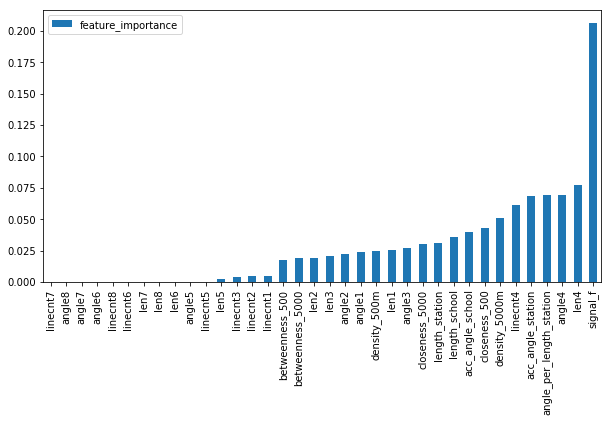

In [109]:
#np.arange(27)

importance=pd.DataFrame({ "feature_importance": cv.best_estimator_.feature_importances_}, index=[ "signal_f","density_5000m", "density_500m", "len1", "len2", "len3", "len4", "len5", "len6", "len7", "len8",
            "linecnt1", "linecnt2", "linecnt3", "linecnt4", "linecnt5", "linecnt6", "linecnt7", "linecnt8",
            "angle1", "angle2", "angle3", "angle4", "angle5", "angle6", "angle7" , "angle8", "length_station",
            "acc_angle_station", "angle_per_length_station", "length_school", "acc_angle_school", 
            "closeness_500", "closeness_5000", "betweenness_5000", "betweenness_500"])

importance.sort_values(ascending=True, by="feature_importance").plot(kind="bar", figsize=(10, 5))
plt.show()

2回目

In [134]:
cv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [135]:
display(cv.best_estimator_.score(X_test, y_test))
display(cv.best_estimator_.score(X_test[y_test>0], y_test[y_test>0]))

0.91666666666666663

0.92307692307692313

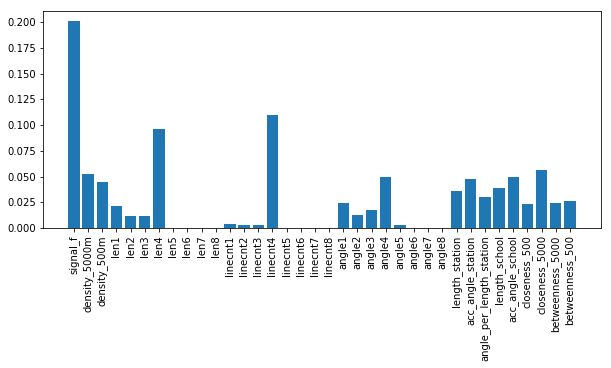

In [136]:
#np.arange(27)
X=np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36])
plt.figure(figsize=(10, 4))
importance=cv.best_estimator_.feature_importances_
plt.bar(X,importance)
plt.xticks(X, [ "signal_f","density_5000m", "density_500m", "len1", "len2", "len3", "len4", "len5", "len6", "len7", "len8",
            "linecnt1", "linecnt2", "linecnt3", "linecnt4", "linecnt5", "linecnt6", "linecnt7", "linecnt8",
            "angle1", "angle2", "angle3", "angle4", "angle5", "angle6", "angle7" , "angle8", "length_station",
            "acc_angle_station", "angle_per_length_station", "length_school", "acc_angle_school", 
            "closeness_500", "closeness_5000", "betweenness_5000", "betweenness_500"],rotation=90)
plt.show()

3回目

In [139]:
cv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [140]:
display(cv.best_estimator_.score(X_test, y_test))
display(cv.best_estimator_.score(X_test[y_test>0], y_test[y_test>0]))

0.9375

0.9285714285714286

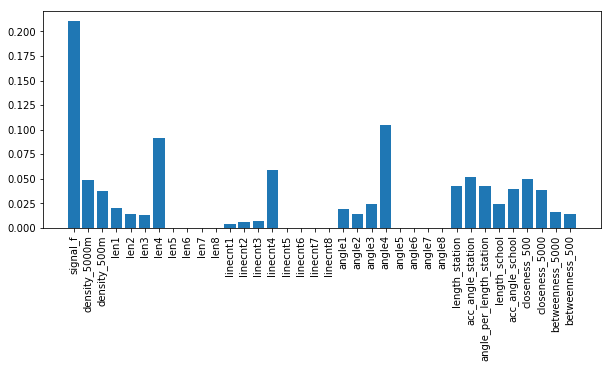

In [141]:
#np.arange(27)
X=np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36])
plt.figure(figsize=(10, 4))
importance=cv.best_estimator_.feature_importances_
plt.bar(X,importance)
plt.xticks(X, [ "signal_f","density_5000m", "density_500m", "len1", "len2", "len3", "len4", "len5", "len6", "len7", "len8",
            "linecnt1", "linecnt2", "linecnt3", "linecnt4", "linecnt5", "linecnt6", "linecnt7", "linecnt8",
            "angle1", "angle2", "angle3", "angle4", "angle5", "angle6", "angle7" , "angle8", "length_station",
            "acc_angle_station", "angle_per_length_station", "length_school", "acc_angle_school", 
            "closeness_500", "closeness_5000", "betweenness_5000", "betweenness_500"],rotation=90)
plt.show()

In [145]:
#学習データ：テストデータ=1:1#
import random
make_accidents=df[df["車両相互フラグ"]!=0]
df_accidents_sample=make_accidents.sample(n=3000)

make_no_accidents=df[df["車両相互フラグ"]==0]
df_no_accidents_sample=make_no_accidents.sample(n=3000)

from sklearn.cross_validation import train_test_split
make_df=pd.concat([df_accidents_sample, df_no_accidents_sample])
make_df_Y=make_df["車両相互フラグ"]
make_df_X=make_df[[ "signal_f","density_5000m", "density_500m", "length_station",
            "acc_angle_station", "angle_per_length_station", "length_school", "acc_angle_school", 
            "closeness_500", "closeness_5000", "betweenness_5000", "betweenness_500"]]
(X_train, X_test, y_train, y_test) = train_test_split(make_df_X, make_df_Y, test_size = 0.2)

In [146]:
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators'  : [3, 5, 10, 20, 50, 100, 200, 500],
    'random_state' : [0],
    'max_depth': [3, 5, 10, 20, 50, 100, 200, 500],
    'n_jobs': [-1]
         }
mod = RandomForestClassifier()
# ハイパーパラメータ探索
cv = GridSearchCV(mod, params, cv = 5, scoring= 'mean_squared_error', n_jobs =1)
cv.fit(X_train, y_train)

/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sam

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [3, 5, 10, 20, 50, 100, 200, 500], 'random_state': [0], 'max_depth': [3, 5, 10, 20, 50, 100, 200, 500], 'n_jobs': [-1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='mean_squared_error', verbose=0)

In [147]:
cv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [148]:
display(cv.best_estimator_.score(X_test, y_test))
display(cv.best_estimator_.score(X_test[y_test>0], y_test[y_test>0]))

0.82250000000000001

0.71088435374149661

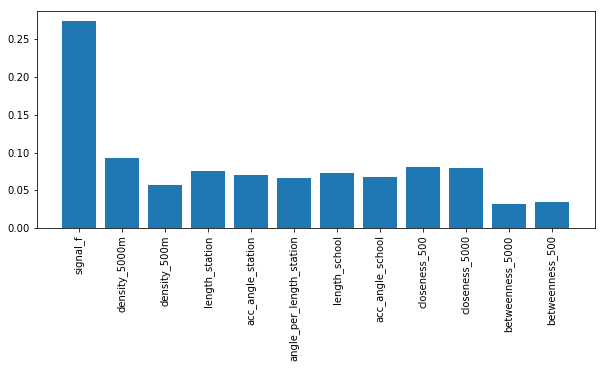

In [149]:
#np.arange(27)
X=np.array([1,2,3,4,5,6,7,8,9,10,11,12])
plt.figure(figsize=(10, 4))
importance=cv.best_estimator_.feature_importances_

plt.bar(X,importance)
plt.xticks(X, [ "signal_f","density_5000m", "density_500m", "length_station",
            "acc_angle_station", "angle_per_length_station", "length_school", "acc_angle_school", 
            "closeness_500", "closeness_5000", "betweenness_5000", "betweenness_500"],rotation=90)
plt.show()

### 人対車両

In [92]:
df["人対車両フラグ"]=df.人対車両率.map(lambda x: 0 if x==0 else 1 if  x<0.00020 else 2)

事故件数

In [93]:
df["人対車両フラグ"].value_counts()

0    544399
1       454
2         1
Name: 人対車両フラグ, dtype: int64

In [94]:
((454+1)/(544399+454+1))*100

0.08350860964588679

In [95]:
#学習データ：テストデータ=1:1#
import random
make_accidents=df[df["人対車両フラグ"]!=0]
df_accidents_sample=make_accidents.sample(n=450)

make_no_accidents=df[df["人対車両フラグ"]==0]
df_no_accidents_sample=make_no_accidents.sample(n=450)

from sklearn.cross_validation import train_test_split
make_df=pd.concat([df_accidents_sample, df_no_accidents_sample])
make_df_Y=make_df["人対車両フラグ"]
make_df_X=make_df[[ "signal_f","density_5000m", "density_500m", "len1", "len2", "len3", "len4", "len5", "len6", "len7", "len8",
            "linecnt1", "linecnt2", "linecnt3", "linecnt4", "linecnt5", "linecnt6", "linecnt7", "linecnt8",
            "angle1", "angle2", "angle3", "angle4", "angle5", "angle6", "angle7" , "angle8", "length_station",
            "acc_angle_station", "angle_per_length_station", "length_school", "acc_angle_school", 
            "closeness_500", "closeness_5000", "betweenness_5000", "betweenness_500"]]
(X_train, X_test, y_train, y_test) = train_test_split(make_df_X, make_df_Y, test_size = 0.2)

In [96]:
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators'  : [3, 5, 10, 20, 50, 100, 200, 500],
    'random_state' : [0],
    'max_depth': [3, 5, 10, 20, 50, 100, 200, 500],
    'n_jobs': [-1]cc
         }
mod = RandomForestClassifier()
# ハイパーパラメータ探索
cv = GridSearchCV(mod, params, cv = 5, scoring= 'mean_squared_error', n_jobs =1)
cv.fit(X_train, y_train)

/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [3, 5, 10, 20, 50, 100, 200, 500], 'random_state': [0], 'max_depth': [3, 5, 10, 20, 50, 100, 200, 500], 'n_jobs': [-1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='mean_squared_error', verbose=0)

1回目

In [97]:
cv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [98]:
display(cv.best_estimator_.score(X_test, y_test))
display(cv.best_estimator_.score(X_test[y_test>0], y_test[y_test>0]))

0.93333333333333335

0.92592592592592593

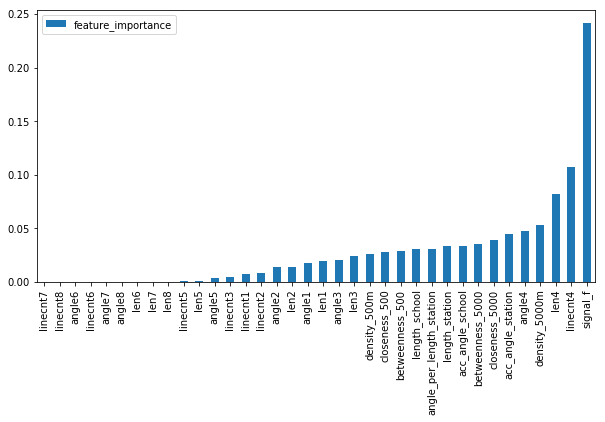

In [99]:
#np.arange(27)

importance=pd.DataFrame({ "feature_importance": cv.best_estimator_.feature_importances_}, index=[ "signal_f","density_5000m", "density_500m", "len1", "len2", "len3", "len4", "len5", "len6", "len7", "len8",
            "linecnt1", "linecnt2", "linecnt3", "linecnt4", "linecnt5", "linecnt6", "linecnt7", "linecnt8",
            "angle1", "angle2", "angle3", "angle4", "angle5", "angle6", "angle7" , "angle8", "length_station",
            "acc_angle_station", "angle_per_length_station", "length_school", "acc_angle_school", 
            "closeness_500", "closeness_5000", "betweenness_5000", "betweenness_500"])

importance.sort_values(ascending=True, by="feature_importance").plot(kind="bar", figsize=(10, 5))
plt.show()

2回目

In [165]:
cv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [166]:
display(cv.best_estimator_.score(X_test, y_test))
display(cv.best_estimator_.score(X_test[y_test>0], y_test[y_test>0]))

0.89583333333333337

0.84615384615384615

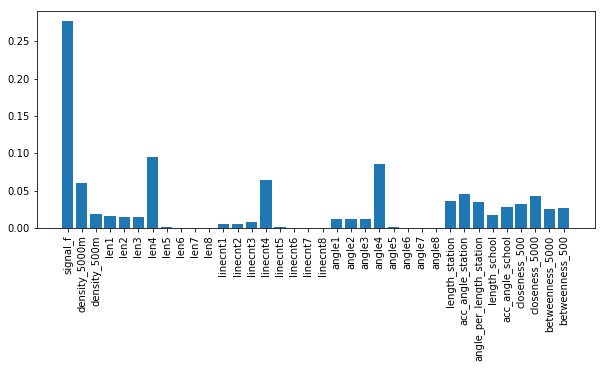

In [167]:
#np.arange(27)
X=np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36])
plt.figure(figsize=(10, 4))
importance=cv.best_estimator_.feature_importances_
plt.bar(X,importance)
plt.xticks(X, [ "signal_f","density_5000m", "density_500m", "len1", "len2", "len3", "len4", "len5", "len6", "len7", "len8",
            "linecnt1", "linecnt2", "linecnt3", "linecnt4", "linecnt5", "linecnt6", "linecnt7", "linecnt8",
            "angle1", "angle2", "angle3", "angle4", "angle5", "angle6", "angle7" , "angle8", "length_station",
            "acc_angle_station", "angle_per_length_station", "length_school", "acc_angle_school", 
            "closeness_500", "closeness_5000", "betweenness_5000", "betweenness_500"],rotation=90)
plt.show()

3回目

In [170]:
cv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [171]:
display(cv.best_estimator_.score(X_test, y_test))
display(cv.best_estimator_.score(X_test[y_test>0], y_test[y_test>0]))

0.9375

0.91666666666666663

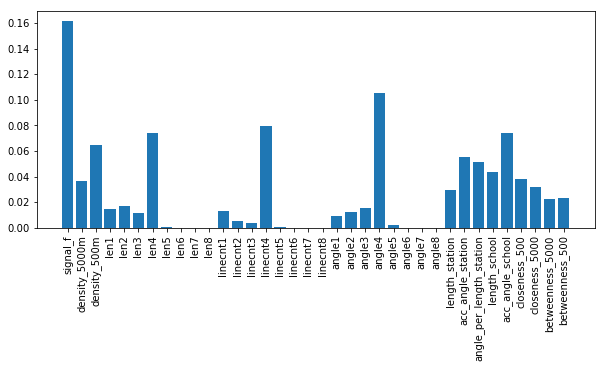

In [172]:
#np.arange(27)
X=np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36])
plt.figure(figsize=(10, 4))
importance=cv.best_estimator_.feature_importances_
plt.bar(X,importance)
plt.xticks(X, [ "signal_f","density_5000m", "density_500m", "len1", "len2", "len3", "len4", "len5", "len6", "len7", "len8",
            "linecnt1", "linecnt2", "linecnt3", "linecnt4", "linecnt5", "linecnt6", "linecnt7", "linecnt8",
            "angle1", "angle2", "angle3", "angle4", "angle5", "angle6", "angle7" , "angle8", "length_station",
            "acc_angle_station", "angle_per_length_station", "length_school", "acc_angle_school", 
            "closeness_500", "closeness_5000", "betweenness_5000", "betweenness_500"],rotation=90)
plt.show()

In [185]:
df

,objectid,signal_f,name_kanji,name_yomi,density_5000m,density_500m,len1,len2,len3,len4,...,人対車両,その他,traffic_volume_24h,車両相互率,車両単独率,人対車両率,その他率,車両相互フラグ,人対車両フラグ,車両単独フラグ
0,3039662.0,0.0,0,0,1817.0,5.0,79.462619,103.554035,152.695646,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
1,3039758.0,0.0,0,0,1817.0,17.0,36.577383,377.828859,58.378316,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
2,3048457.0,0.0,0,0,1817.0,35.0,5.019972,104.641242,48.564055,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
3,3048458.0,0.0,0,0,1817.0,35.0,18.850006,59.219884,58.628580,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
4,3048459.0,0.0,0,0,1817.0,35.0,580.597893,45.769366,24.621877,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
5,3048460.0,0.0,0,0,1817.0,1.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
6,3048461.0,0.0,0,0,1817.0,1.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
7,3048462.0,0.0,0,0,1817.0,35.0,51.303188,1515.133680,5.019972,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
8,3048463.0,0.0,0,0,1817.0,35.0,23.710727,32.444397,66.775990,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
9,3048464.0,0.0,0,0,1817.0,35.0,40.840967,273.783353,63.757748,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0


愛知県全域（ランダムシード100）

In [194]:
cv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=-1, oob_score=False, random_state=100,
            verbose=0, warm_start=False)

In [195]:
display(cv.best_estimator_.score(X_test, y_test))
display(cv.best_estimator_.score(X_test[y_test>0], y_test[y_test>0]))

0.82916666666666672

0.7330016583747927

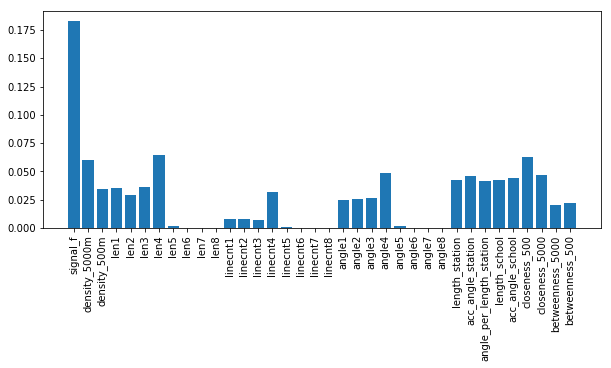

In [196]:
#np.arange(27)
X=np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36])
plt.figure(figsize=(10, 4))
importance=cv.best_estimator_.feature_importances_
plt.bar(X,importance)
plt.xticks(X, [ "signal_f","density_5000m", "density_500m", "len1", "len2", "len3", "len4", "len5", "len6", "len7", "len8",
            "linecnt1", "linecnt2", "linecnt3", "linecnt4", "linecnt5", "linecnt6", "linecnt7", "linecnt8",
            "angle1", "angle2", "angle3", "angle4", "angle5", "angle6", "angle7" , "angle8", "length_station",
            "acc_angle_station", "angle_per_length_station", "length_school", "acc_angle_school", 
            "closeness_500", "closeness_5000", "betweenness_5000", "betweenness_500"],rotation=90)
plt.show()

愛知県全域（ランダムシード200）

In [201]:
cv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=-1, oob_score=False, random_state=200,
            verbose=0, warm_start=False)

In [202]:
display(cv.best_estimator_.score(X_test, y_test))
display(cv.best_estimator_.score(X_test[y_test>0], y_test[y_test>0]))

0.82999999999999996

0.72758620689655173

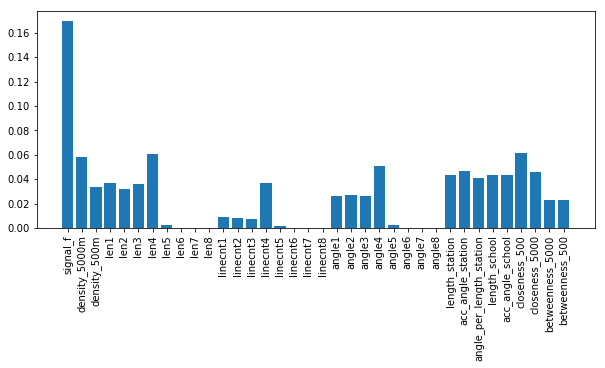

In [203]:
#np.arange(27)
X=np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36])
plt.figure(figsize=(10, 4))
importance=cv.best_estimator_.feature_importances_
plt.bar(X,importance)
plt.xticks(X, [ "signal_f","density_5000m", "density_500m", "len1", "len2", "len3", "len4", "len5", "len6", "len7", "len8",
            "linecnt1", "linecnt2", "linecnt3", "linecnt4", "linecnt5", "linecnt6", "linecnt7", "linecnt8",
            "angle1", "angle2", "angle3", "angle4", "angle5", "angle6", "angle7" , "angle8", "length_station",
            "acc_angle_station", "angle_per_length_station", "length_school", "acc_angle_school", 
            "closeness_500", "closeness_5000", "betweenness_5000", "betweenness_500"],rotation=90)
plt.show()

愛知県全域（ランダムシード999）

In [205]:
cv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=False, random_state=999,
            verbose=0, warm_start=False)

In [206]:
display(cv.best_estimator_.score(X_test, y_test))
display(cv.best_estimator_.score(X_test[y_test>0], y_test[y_test>0]))

0.82750000000000001

0.72931034482758617

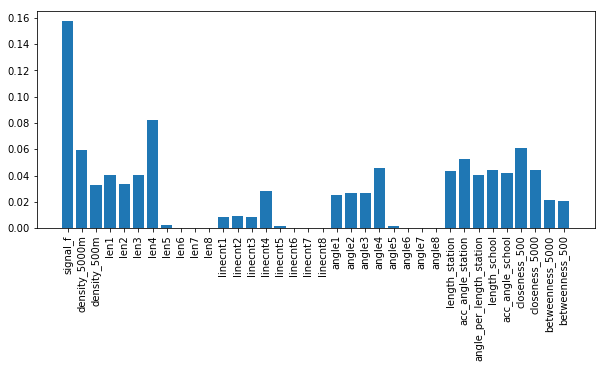

In [207]:
#np.arange(27)
X=np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36])
plt.figure(figsize=(10, 4))
importance=cv.best_estimator_.feature_importances_
plt.bar(X,importance)
plt.xticks(X, [ "signal_f","density_5000m", "density_500m", "len1", "len2", "len3", "len4", "len5", "len6", "len7", "len8",
            "linecnt1", "linecnt2", "linecnt3", "linecnt4", "linecnt5", "linecnt6", "linecnt7", "linecnt8",
            "angle1", "angle2", "angle3", "angle4", "angle5", "angle6", "angle7" , "angle8", "length_station",
            "acc_angle_station", "angle_per_length_station", "length_school", "acc_angle_school", 
            "closeness_500", "closeness_5000", "betweenness_5000", "betweenness_500"],rotation=90)
plt.show()

signal_fを除いた場合（1回目）


In [214]:
cv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [215]:
display(cv.best_estimator_.score(X_test, y_test))
display(cv.best_estimator_.score(X_test[y_test>0], y_test[y_test>0]))

0.81916666666666671

0.74634146341463414

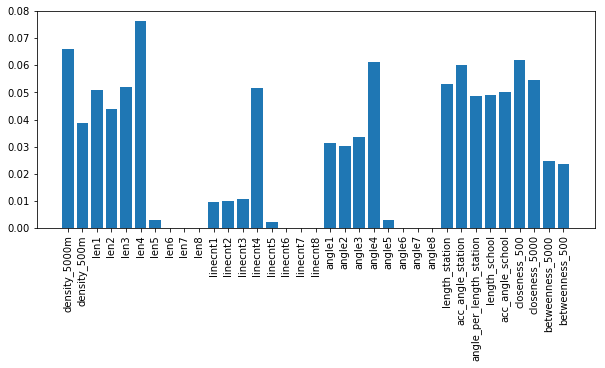

In [216]:
#np.arange(27)
X=np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35])
plt.figure(figsize=(10, 4))
importance=cv.best_estimator_.feature_importances_
plt.bar(X,importance)
plt.xticks(X, [ "density_5000m", "density_500m", "len1", "len2", "len3", "len4", "len5", "len6", "len7", "len8",
            "linecnt1", "linecnt2", "linecnt3", "linecnt4", "linecnt5", "linecnt6", "linecnt7", "linecnt8",
            "angle1", "angle2", "angle3", "angle4", "angle5", "angle6", "angle7" , "angle8", "length_station",
            "acc_angle_station", "angle_per_length_station", "length_school", "acc_angle_school", 
            "closeness_500", "closeness_5000", "betweenness_5000", "betweenness_500"],rotation=90)
plt.show()

signal_fを除いた場合（2回目）

In [219]:
cv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [223]:
display(cv.best_estimator_.score(X_test, y_test))
display(cv.best_estimator_.score(X_test[y_test>0], y_test[y_test>0]))
display(cv.best_estimator_.score(X_test[y_test==0], y_test[y_test==0]))

0.78916666666666668

0.7226027397260274

0.85227272727272729

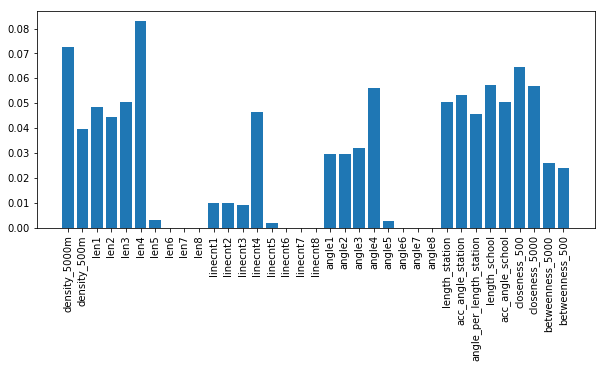

In [221]:
#np.arange(27)
X=np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35])
plt.figure(figsize=(10, 4))
importance=cv.best_estimator_.feature_importances_
plt.bar(X,importance)
plt.xticks(X, [ "density_5000m", "density_500m", "len1", "len2", "len3", "len4", "len5", "len6", "len7", "len8",
            "linecnt1", "linecnt2", "linecnt3", "linecnt4", "linecnt5", "linecnt6", "linecnt7", "linecnt8",
            "angle1", "angle2", "angle3", "angle4", "angle5", "angle6", "angle7" , "angle8", "length_station",
            "acc_angle_station", "angle_per_length_station", "length_school", "acc_angle_school", 
            "closeness_500", "closeness_5000", "betweenness_5000", "betweenness_500"],rotation=90)
plt.show()

In [226]:
cv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [227]:
display(cv.best_estimator_.score(X_test, y_test))
display(cv.best_estimator_.score(X_test[y_test>0], y_test[y_test>0]))
display(cv.best_estimator_.score(X_test[y_test==0], y_test[y_test==0]))

0.82999999999999996

0.7219512195121951

0.94358974358974357